# 差分方程式

## 始める前に

次のセルの１行目以外をアンコメント（`# `を削除）しなさい。アンコメントするには次の手順に従う。
* Windowsの場合：１行目以外の全ての行を選択し，`Ctrl`を押したまま`/`を押す。
* Macの場合：１行目以外の全ての行を選択し，`command`を押したまま`/`を押す。

In [ ]:
# CELL PROVIDED
# import piplite
# await piplite.install(['py4macro','japanize-matplotlib-jlite'])
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (4, 3)

次のコードを実行しなさい。

In [1]:
# CELL PROVIDED
import japanize_matplotlib_jlite
import numpy as np
import pandas as pd

## はじめに

この章の目的は，動学モデルの基礎（の基礎）を理解すること。
時間を扱う「動学」と聞くと難しく感じるかもしれないが，構える必要はない。
高校数学で習った漸化式（以下では「差分方程式」を同義として扱う）を使うが，解法テクニックが重要では**ない**。
ここで重要なのは，差分方程式の考え方を捉えるコードの書き方を理解することであり，後は`Python`が計算することになる。

## 1階差分方程式

### 説明

コードを説明する前に，差分方程式（漸化式）の特徴を説明する。
差分方程式とは，初期の値を所与として値の数列を定義する方程式。
言い換えると，$t$期の変数の値は$t-1$期やそれ以前の値に依存する関係を表す式。
例を考えよう。

$$
x_{t+1}=ax_t+b,\quad t=0,1,2,3\cdots
$$

$x_0$は与えられていると仮定しよう。
逐次的に代入しよう。

\begin{align}
x_{t+1}
&=ax_t+b\\
&=a(ax_{t-1}+b)+b=a^2x_{t-1}+b(1+a) \\
&=a^2(ax_{t-2}+b)+b(1+a)=a^3x_{t-2}+b(1+a+a^2) \\
&=a^3(ax_{t-3}+b)+b(1+a+a^2)=a^4x_{t-3}+b(1+a+a^2+a^3) \\
&\qquad\vdots \\
&=a^{t+1}x_0+b\sum_{i=0}^ta^i
\end{align}

このことから次のことがわかる。

$t\rightarrow\infty$とすると（$x_0\ne 0$）

* $a=1$の場合
    * $a^{t+1}=1$
    * $b=0$の場合，$x_t$は同じ値$x_0$にとどまる。
    * $b>0$の場合，$b\sum_{i=0}^ta^i=b(1+t)\rightarrow\infty$となり$x_t$は発散する（$x_t\rightarrow\infty$）。
    * $b<0$の場合，$b\sum_{i=0}^ta^i=b(1+t)\rightarrow-\infty$となり$x_t$は発散する（$x_t\rightarrow-\infty$）。
* $a=-1$の場合
    * $a^{t+1}=1$もしくは$-1$
    * $b=0$の場合，$x_t=-x_{t-1}$となり，$x_t=x_0$もしくは$x_t=-x_0$
    * $b\ne0$の場合，$x_t$は振動し発散する（$x_t\rightarrow\pm\infty$）。
* $a>1$の場合，$a^{t+1}\rightarrow\infty$となり$x_t$は正の無限大に発散する（$x_t\rightarrow\infty$）。
* $a<-1$の場合，$x_t$は振動し発散する（$x_t\rightarrow\pm\infty$）。
* $|a|<1$の場合$x_t$は**収束**
    * $0<a<1$の場合は単調的に収束
    * $-1<a<0$の場合は振動し収束
    * $a^{t+1}x_0\rightarrow 0$
    * $\sum_{i=0}^ta^t$は$S$に収束する。
    
\begin{align}
    S&=\sum_{i=0}^{\infty}a^t=1+a+a^2+a^3+\cdots \\
    aS&=a+a^2+a^3+\cdots \\
    S-aS&=1 \\
    &\Downarrow \\
    S&=\dfrac{1}{1-a}
\end{align}
    
* $t\rightarrow\infty$の場合の$x_t$の値を$x_{*}$としよう。$t\rightarrow\infty$の下では$x_t=x_{t-1}\equiv x_{*}$となるため以下が成立する。
    
$$
x_{*}=ax_{*}+b
\quad
\Rightarrow
\quad
x_{*}=\dfrac{b}{1-a}=bS
$$
    
ここで$x_{*}$を**定常状態**(経済学の長期均衡を意味する)と呼び，その値を**定常値**と呼ぶ。

均衡を考える上で$x_t$が発散するケースは除外し，収束するケースに着目する。

### 例１

* 初期値：$x_0=1$

$$
x_{t+1}=0.4x_{t}+3
$$

* $0.4<1$なため収束することが分かる。
* 定常状態では次の値となる。

    $$
    x_{*}=0.4x_{*}+3
    \quad\Rightarrow\quad
    x_{*}=\dfrac{3}{1-0.4}=5
    $$

* 計算した$x$の値を一時的に割り当てるアップデート用の変数を使う方法を考える。

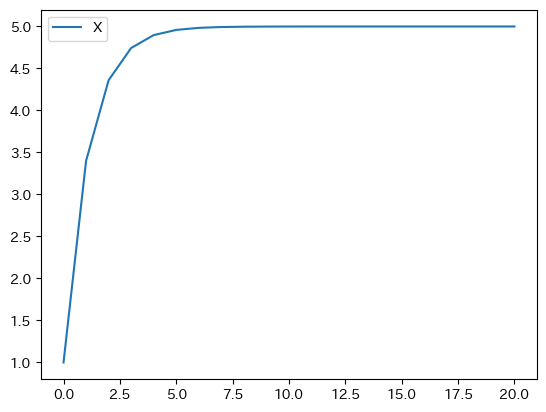

In [18]:
x = 1                  # 1

x_lst = [x]           # 2

for _ in range(20):
    
    x = 0.4 * x + 3    # 3
        
    x_lst.append(x)   # 4

df = pd.DataFrame({'X':x_list})
df.plot()
pass

この図の縦軸は$x_t$であり，横軸は行インデックスが`float`として表示されており，ループの回数と同じ（自動表示なので整数となる場合もある）。

### 例２

* $x_0=1.1$

    $$
    x_{t+1}=1.2x_{t}-0.2
    $$

* $1.2>1$なため発散する。
* 定常状態の値を計算する。

    $$
    x_{*}=1.2x_{*}-0.2
    \quad\Rightarrow\quad
    x_{*}=\dfrac{0.2}{1.2-1.0}=1
    $$

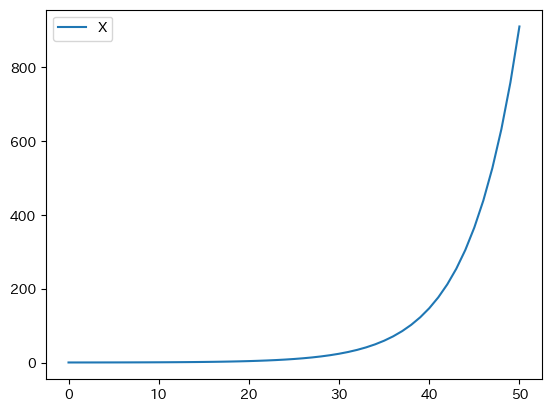

In [20]:
x = 1.1

x_lst = [x]

for _ in range(50):
    
    x = 1.2 * x - 0.2
        
    x_lst.append(x)

df = pd.DataFrame({'X':x_lst})
df.plot()
pass

### 例３

次式は非線形の差分方程式となっている。

$$
x_{t+1}=ax_{t}^{0.5},\quad x_t>0,\;a>0
$$

しかし数値計算のための`Python`コードに関しては大きな違いはない。
単に，コードの中で非線形の式を書くだけで良い。

しかし，収束か発散かの安定性（stability）を解析的に確認するには，定常状態の**近傍**を考える必要がある。
非線形差分方程式を定常状態の周りで線形近似することで，あたかも線形の様に考えて安定性を確認できる。
手法としては，以下で説明するテイラー展開を使うが，線形近似すると次式となる。

$$x_{t+1}=0.5x_t+0.5a^2$$

`0.5`は定常値$x_{*}=a^2$への収束を意味する。

差分方程式が**45度線近傍で増加関数**の場合はもっと簡単な判定方法がある。
> 縦軸に$x_{t+1}$，横軸に$x_t$の図で差分方程式が45度線と
> * 「上から交差」する場合，$x_t$は定常値へ収束する（定常状態は安定的）
> * 「下から交差」する場合，$x_t$は発散する（定常状態は不安定）

**＜参考：テイラー展開による１次線形近似＞**

* 関数$y=f(k)$を$k_{*}$でテイラー展開すると次式となる。

    $$
    y=f(k_{*})+\left.\frac{df}{dk}\right|_{k=k_{*}}(k-k_{*})
    $$

[式](eq:8-ex3)に当てはめると次のような対応関係にある。
* $y\;\Rightarrow\;x_{t+1}$
* $f(k)\;\Rightarrow\;ak_{t}^{0.5}$
* $k_{*}\;\Rightarrow\;x_{*}$

テーラー展開する前に，$x_{*}$を計算してみよう。[式](eq:8-ex3)で$x_{t+1}=x_{t}=x_{*}$とすると

$$
x_{*}=ax_{*}^{0.5}
\quad\Rightarrow\quad
x_{*}=a^2
$$

これらを使い，[式](eq:8-ex3)をテーラー展開すると

\begin{equation}
\begin{aligned}
x_{t+1}
&=ax_{*}^{0.5}+\left.0.5ax_{t}^{-0.5}\right|_{x_t=x_{*}}(x_t-x_{*}) \\
&=ax_{*}^{0.5}+0.5ax_{*}^{-0.5}(x_t-x_{*}) \\
&=a\left(a^2\right)^{0.5}+0.5a\left(a^2\right)^{-0.5}(x_t-a^2) \\
&=a^{2}+0.5(x_t-a^2)\\
&=0.5x_t+0.5a^2
\end{aligned}
\end{equation}

となる。$0.5<1$なので収束することが確認できた。

## ケインズの45度線モデル

次の仮定を置く。
* 所得恒等式：$y_t=c_t+inv_t$
* 消費：$c_t=a+by_t$
    * $a>0$：所得とは独立した消費
    * $0<b<1$：限界消費性向
* 投資：$inv_t=d+fy_{t-1}$
    * $t$期の投資は前期である$t-1$期の産出量に依存すると仮定（投資には時間がかかる）。
    * $f>0$
    * $d>0$
* 均衡式：$y_t=a+by_t+d+fy_{t-1}$

均衡式を１期進めると次式となる。

$$
y_{t+1}=\frac{f}{1-b}y_t+\frac{a+d}{1-b}
$$ (eq:8-45degree)
        
* $\dfrac{f}{1-b}<1$：収束
* $\dfrac{f}{1-b}\geq 1$：発散
* 定常状態を計算しよう。

\begin{align}
    y_{t+1}&=y_t=y_* \\
    &\Downarrow \\
    y_*&=\frac{a+d}{1-b-f}
\end{align}
    
定常状態で$y_*>0$が成立してこそ意味があるので，$1>b+f$を仮定する。

$$\dfrac{f}{1-b}<1$$

"""
引数
    y0: GDPの初期値
    a: 所得に依存しない消費
    b: 限界消費性向
    d: 産出量に依存しない投資
    f: 前期の産出量に依存する投資
    n: ループの回数（デフォルト10）
戻り値
    yの値からなるDataFrame
"""

In [2]:
def model45(y0,a,b,d,f,n=10):
    """引数                             # 1
            y0: GDPの初期値
            a: 所得に依存しない消費
            b: 限界消費性向
            d: 産出量に依存しない投資
            f: 前期の産出量に依存する投資
            n: ループの回数（デフォルト10）
        戻り値
            yの値からなるDataFrame"""
    
    y = y0                              # 2
    
    y_lst = [y0]                       # 3

    for i in range(n):
        
        y = y*f/(1-b) + (a+d)/(1-b)     # 4
        y_lst.append(y)                # 5

    yss = (a+d)/(1-b-f)                 # 6
    
    print(f'定常状態での産出量:{yss:.1f}') # 7
    
    return pd.DataFrame({'output':y_lst})  # 8

定常状態での産出量:333.3


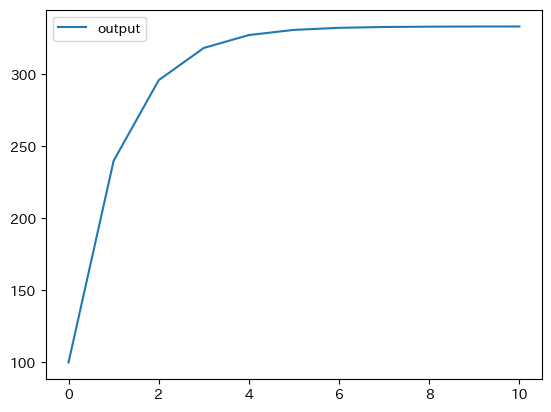

In [3]:
model45(100, a=50, b=0.5, d=50, f=0.2).plot()
pass

初期値が定常値よりも大きい場合どうなるか確認してみよう。

## 蜘蛛の巣モデル

需要と供給モデルであり，均衡では価格と財の量が決定される。

* 需要曲線
    * 消費者は今期の価格に基づいて今期の需要を決める。
    
        $$
        d_t = a - bp_t,\quad a,b>0
        $$
        
* 供給曲線
    * 生産者は今期の価格を観察し来期の生産量を決める（適応的期待と解釈）。例えば，農家が想定できる。
    
        $$
        s_t = -c + dp_{t-1},\quad c,d>0
        $$
        
* 均衡条件

    $$
    d_t=s_t\equiv q_t
    $$

均衡式を１つにまとめる。

$$
p_t = \frac{a+c}{b} - \frac{d}{b}p_{t-1}
$$ (eq:8-cobweb)


$$
\text{需要曲線の傾き}=\frac{1}{b},
\quad
\text{供給曲線の傾き}=\frac{1}{d}
$$

* 収束：$\dfrac{d}{b}<1$もしくは$\dfrac{1}{b}<\dfrac{1}{d}$
    * 需要曲線と比べて供給曲線の傾きが大きい場合に長期均衡に収束する。
* 発散：$\dfrac{d}{b}>1$もしくは$\dfrac{1}{b}>\dfrac{1}{d}$
    * 需要曲線と比べて供給曲線の傾きが小さい場合に発散する。
* 2期間サイクル：$\dfrac{d}{b}=1$

定常状態（長期的均衡）の価格は次のように計算できる。

\begin{align}
p_*
&= \frac{a+c}{b} - \frac{d}{b}p_{*} \\
&\Downarrow \\
p_{*}&=\dfrac{a+c}{b+d}
\end{align}

また定常状態の生産量は需要曲線もしくは供給曲線を使って計算する。

$$
q_t=q_{*}=a-bp_{*}
$$

"""
引数
    p0: 初期値
    a: 需要曲線の切片
    b: 需要曲線の傾き
    c: 供給曲線の切片
    d: 供給曲線の傾き
    n: ループ計算の回数
返り値：
    価格と量のDataFrame
"""


In [4]:
def cobweb(p0, a, b, c, d, n=50):
    """引数
            p0: 初期値
            a: 需要曲線の切片
            b: 需要曲線の傾き
            c: 供給曲線の切片
            d: 供給曲線の傾き
            n: ループ計算の回数
        返り値：
            価格と量のDataFrame
    """
    
    p = p0       # 初期の価格
    
    q_lst = []
    p_lst = []

    for i in range(n):
        
        p = (a+c)/b - (d/b)*p
        q = a-b*p

        q_lst.append(q)
        p_lst.append(p)

    # 定常状態
    pss = (a+c)/(b+d)
    qss = a-b*pss
    
    print(f'定常状態での価格:{pss:.1f}\n定常状態での量:　{qss:.1f}')
    
    dic = {'output':q_lst, 'price':p_lst}
    return pd.DataFrame(dic)

まず$\dfrac{d}{b}<1$を仮定し収束するケースを考えよう。

定常状態での価格:48.1
定常状態での量:　47.1


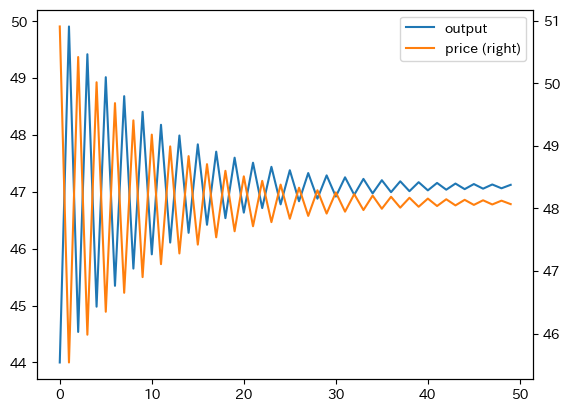

In [5]:
cobweb(45, a=100, b=1.1, c=1, d=1).plot(secondary_y='price')
pass

$\dfrac{d}{b}>1$を仮定し発散するケースをプロットする。

定常状態での価格:48.1
定常状態での量:　51.9


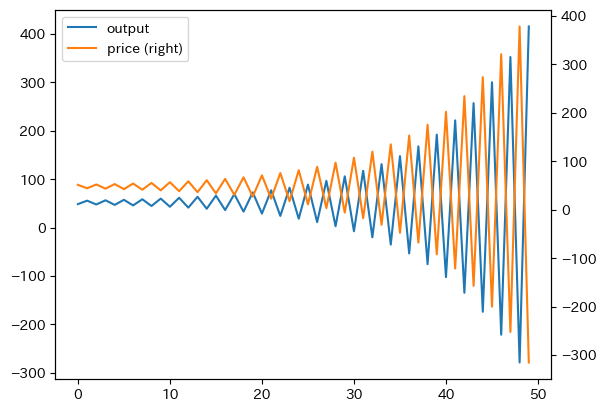

In [6]:
cobweb(45, a=100, b=1, c=1, d=1.1).plot(secondary_y='price')
pass